# Amit Fallach
# linkedin - https://www.linkedin.com/in/amitfallach

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from datetime import timedelta

C:\Users\amitf\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
url = 'C:\\Users\\amitf\\Desktop\\amit\\כריית נתונים מתקדמת בפייתון\\מטלות\\מטלה 2\\matala2_cosmetics_2019-Nov.csv'
data= pd.read_csv(url)

<ipython-input-2-f218f5627c46>:2: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  data= pd.read_csv(url)


### call the columns names and count null values

In [3]:
data.columns

Index(['event_time', 'event_type', 'product_id', 'category_id',
       'category_code', 'brand', 'price', 'user_id', 'user_session'],
      dtype='object')

In [4]:
data.isnull().sum().sort_values()

event_time             0
event_type             0
product_id             0
category_id            0
price                  0
user_id                0
user_session         813
brand            1986029
category_code    4560089
dtype: int64

In [5]:
data.dtypes

event_time       object
event_type       object
product_id        int64
category_id       int64
category_code    object
brand            object
price            object
user_id           int64
user_session     object
dtype: object

In [6]:
data

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-11-01 00:00:02 UTC,view,5802432,1487580009286598681,NaN,NaN,0.32,562076640,09fafd6c-6c99-46b1-834f-33527f4de241
1,2019-11-01 00:00:09 UTC,cart,5844397,1487580006317032337,NaN,NaN,2.38,553329724,2067216c-31b5-455d-a1cc-af0575a34ffb
2,2019-11-01 00:00:10 UTC,view,5837166,1783999064103190764,NaN,pnb,22.22,556138645,57ed222e-a54a-4907-9944-5a875c2d7f4f
3,2019-11-01 00:00:11 UTC,cart,5876812,1487580010100293687,NaN,jessnail,3.16,564506666,186c1951-8052-4b37-adce-dd9644b1d5f7
4,2019-11-01 00:00:24 UTC,remove_from_cart,5826182,1487580007483048900,NaN,NaN,3.33,553329724,2067216c-31b5-455d-a1cc-af0575a34ffb
...,...,...,...,...,...,...,...,...,...
4635832,2019-11-30 23:59:46 UTC,view,5830317,1487580009496313889,NaN,NaN,4.76,457678989,ee50b160-a4db-4722-8751-6812c5b38295
4635833,2019-11-30 23:59:47 UTC,view,5733064,1487580004832248652,NaN,beautix,9.37,422196217,ab5e6dd5-8700-4ecc-a300-9f1eca5d1a95
4635834,2019-11-30 23:59:47 UTC,view,5867785,1487580007835370453,NaN,kims,31.1,572579084,d42865b7-7e04-4038-9be0-a59165625f06
4635835,2019-11-30 23:59:57 UTC,view,5779406,2151191071051219817,NaN,NaN,2.86,540006764,d4b5aa49-d731-40f1-92f1-277416d6e063


# Q1

### we can see that the coulmn "event_time" type isnt "datetime"

In [7]:
data['event_time'] = data['event_time'].apply(lambda x:datetime.strptime(x,'%Y-%m-%d %H:%M:%S UTC'))

In [8]:
data = data.sort_values(['user_session', 'event_time'])
data["duration_to_next_event"] = data.groupby('user_session')['event_time'].diff(periods=-1).abs().dt.total_seconds()
data["duration_to_next_event"] = data["duration_to_next_event"].fillna(0)
data = data.reset_index(drop=True)
data.head(10)

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,duration_to_next_event
0,2019-11-05 07:57:05,view,5829298,1487580011585077370,NaN,farmstay,0.79,556321594,00000dd2-0f5d-4fc9-9d6b-2fc8c7514b04,0.0
1,2019-11-11 12:15:10,view,5771614,2193074740619379535,furniture.living_room.cabinet,kosmekka,150.79,570103701,00001bc6-1e04-4861-be5d-1bc73929c21a,0.0
2,2019-11-15 03:50:03,view,5568472,1487580005595612013,NaN,NaN,3.0,571677620,00001e77-5db8-4e96-ab7a-022ed3caf8b3,0.0
3,2019-11-13 04:37:37,view,5864850,1487580005268456287,NaN,NaN,12.7,504468592,00004c7d-9507-474e-a559-0fdaccaaa390,0.0
4,2019-11-14 03:59:32,view,5861620,1487580008263189483,NaN,lador,2.25,571211128,0000597b-de39-4a77-9fe5-02c8792ca14e,56.0
5,2019-11-14 04:00:28,view,5861619,1487580008246412266,NaN,lador,6.38,571211128,0000597b-de39-4a77-9fe5-02c8792ca14e,95.0
6,2019-11-14 04:02:03,view,5861591,1487580009143992338,NaN,lador,2.22,571211128,0000597b-de39-4a77-9fe5-02c8792ca14e,0.0
7,2019-11-03 12:45:44,view,5846437,1487580013950664926,NaN,browxenna,45.24,473600495,00005ac0-5c22-4756-bb12-31b90af75fa3,11.0
8,2019-11-03 12:45:55,view,5846436,1487580013950664926,NaN,browxenna,45.24,473600495,00005ac0-5c22-4756-bb12-31b90af75fa3,0.0
9,2019-11-15 22:03:28,view,5847576,1982860263572898112,NaN,concept,7.78,530580938,0000645a-8160-4a3d-91bf-154bff0a22e3,287.0


# Q2

In [9]:
data = data.sort_values(['user_id', 'event_time'])
data['time_diff'] = data.groupby('user_id')['event_time'].diff(periods=1).dt.days.fillna(0)
data["panel"] = (data['user_id'].shift(1) != data['user_id']) | ((data['user_session'].shift(1) != data['user_session']) & (data['time_diff']>5)  & (data['user_id'].shift(1) == data['user_id']))
data['funnel_number'] = data.groupby('user_id')['panel'].cumsum()
data = data.drop(['time_diff',"panel"], axis=1)
data = data.reset_index(drop=True)
data.tail()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,duration_to_next_event,funnel_number
4635832,2019-11-30 23:56:14,view,5892179,1487580013950664926,NaN,NaN,18.89,579968623,a06e9a89-55ff-4c3a-abd6-aa4fdf808058,3.0,1
4635833,2019-11-30 23:56:17,view,5900651,1487580013950664926,NaN,NaN,19.52,579968623,a06e9a89-55ff-4c3a-abd6-aa4fdf808058,4.0,1
4635834,2019-11-30 23:56:21,view,5892179,1487580013950664926,NaN,NaN,18.89,579968623,a06e9a89-55ff-4c3a-abd6-aa4fdf808058,0.0,1
4635835,2019-11-30 23:56:46,view,5790563,1487580008263189483,NaN,NaN,7.14,579968937,878af093-7570-48ae-966c-d50ce61e390c,0.0,1
4635836,2019-11-30 23:59:58,view,5880201,2029731308699124089,NaN,rasyan,3.76,579969854,e9fa2c3e-8c9e-448c-880a-21ca57c18b3b,0.0,1


In [10]:
data[['funnel_number']].value_counts()

funnel_number
1                3795340
2                 741351
3                  95851
4                   3294
5                      1
dtype: int64

# Q3

In [11]:
data["index"] = (data['user_id'].shift(1) == data['user_id'] )& (data['user_session'].shift(1) != data['user_session']) & (data['funnel_number'].shift(1) == data['funnel_number'])
data["index_in_panel"] = data.groupby('user_id')["index"].cumsum() + 1
data = data.drop("index", axis=1)
data = data.reset_index(drop=True)
data.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,duration_to_next_event,funnel_number,index_in_panel
0,2019-11-04 15:28:57,view,5240,1487580009202712597,NaN,runail,4.05,1120748,d0484d94-7ac1-44e8-a310-2360da11ad9d,0.0,1,1
1,2019-11-19 09:56:09,view,5711145,1487580005008409427,NaN,f.o.x,6.03,1458813,b16644a2-44db-4650-8156-f6f03782d432,0.0,1,1
2,2019-11-19 11:14:48,view,5814066,1487580005855658874,NaN,grattol,2.3,1458813,6873a205-d9f5-4d51-b3eb-b4bfddfe907c,0.0,1,2
3,2019-11-20 11:58:06,view,5800358,1487580005553668971,NaN,NaN,7.46,1458813,921ff98c-a419-4132-af94-ee26880334b0,21.0,1,3
4,2019-11-20 11:58:27,view,5800349,1487580005553668971,NaN,NaN,7.46,1458813,921ff98c-a419-4132-af94-ee26880334b0,72.0,1,3


### check user id with few funnels to see the change

In [12]:
data[data['user_id']==27872944]

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,duration_to_next_event,funnel_number,index_in_panel
582,2019-11-02 13:19:45,view,5739901,1487580010125459512,NaN,milv,3.49,27872944,465c3a6d-8d8c-407f-bc3c-9502452f41f1,142.0,1,1
583,2019-11-02 13:22:07,view,9823,1487580012717539489,NaN,NaN,3.41,27872944,465c3a6d-8d8c-407f-bc3c-9502452f41f1,0.0,1,1
584,2019-11-16 08:33:46,view,5739901,1487580010125459512,NaN,milv,3.49,27872944,cb39283d-8e0f-42af-96af-e26184d600fc,0.0,2,1
585,2019-11-25 10:08:04,view,9823,1487580012717539489,NaN,NaN,3.41,27872944,dce65169-64fc-4fe5-809e-1d913edbe54e,0.0,3,1
586,2019-11-26 13:32:12,view,5790561,1487580011585077370,NaN,NaN,38.1,27872944,deee6ce7-305e-4ed8-8ba8-1266e7b619ae,71.0,3,2
587,2019-11-26 13:33:23,view,5790562,1487580011585077370,NaN,NaN,30.48,27872944,deee6ce7-305e-4ed8-8ba8-1266e7b619ae,0.0,3,2


# Q4

### First I chose to read the relevant column to understand what the values that need to be changed look like, I changed the column type so that I could sort it and display the desired values ​​easily

In [13]:
data = data.astype({'price':str})
data[['price']].sort_values(by = 'price',ascending=False).head(10)

,price
3153358,Net 7.3
840871,Net 6.35
1622638,Net 5.02
3200403,Net 4.76
546537,Net 4.11
2892308,Net 2.48
355717,Net 1.11
3615462,99.84
1223535,99.84
1471795,99.84


In [14]:
def decimal(column):
    match = re.search(r'\d+\.\d+', str(column))
    if match:
        return float(match.group())
    else:
        return None

data['price'] = data['price'].apply(decimal)

### call the first 3 rows from the last block to see the change

In [15]:
data.iloc[[3153358,840871,1622638],]

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,duration_to_next_event,funnel_number,index_in_panel
3153358,2019-11-01 04:47:50,remove_from_cart,5771957,1559261858748170632,NaN,NaN,7.30,565198389,869b2e53-5bd5-4c68-8e99-205a04edc4a3,11.0,1,2
840871,2019-11-01 05:17:20,cart,5836157,1487580008313521133,NaN,NaN,6.35,440401570,9e61c992-e2a2-477e-8da0-4affc31e7257,60.0,1,1
1622638,2019-11-01 05:20:05,remove_from_cart,5845379,1487580013581566154,NaN,NaN,5.02,507429252,fa4727e8-cb74-4cc8-84f0-2e88c8662065,0.0,1,1


# Q5

### present summary of 'event_type' column to decide which type of graph is more correct to show the data

In [16]:
data[['event_type']].describe()

,event_type
count,4635837
unique,4
top,view
freq,2076132


In [17]:
data5  = data.groupby('event_type')[['event_type']].count()

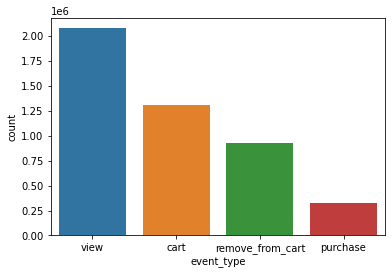

In [18]:
sns.countplot(x='event_type', data=data)


# Q6

In [19]:
df6 = data.groupby('user_session', group_keys=False)[['user_id']].max()
df6['funnel_number'] = data.groupby('user_session', group_keys=False)[['funnel_number']].max()
df6['index_in_panel'] = data.groupby('user_session', group_keys=False)[['index_in_panel']].max()
df6['events_for_session'] = data.groupby('user_session', group_keys=False)[['event_time']].count()
df6['session_time(seconds)'] = data.groupby('user_session', group_keys=False)[["duration_to_next_event"]].sum()

df6

,user_id,funnel_number,index_in_panel,events_for_session,session_time(seconds)
user_session,,,,,
00000dd2-0f5d-4fc9-9d6b-2fc8c7514b04,556321594,1,1,1,0.0
00001bc6-1e04-4861-be5d-1bc73929c21a,570103701,1,2,1,0.0
00001e77-5db8-4e96-ab7a-022ed3caf8b3,571677620,1,1,1,0.0
00004c7d-9507-474e-a559-0fdaccaaa390,504468592,2,6,1,0.0
0000597b-de39-4a77-9fe5-02c8792ca14e,571211128,1,2,3,151.0
...,...,...,...,...,...
ffff5096-a5d3-4abf-b34b-9627203bb025,576334415,1,1,1,0.0
ffff5954-5b7f-4dd8-9fa1-078ae32e684f,577542926,1,1,2,74.0
ffff8044-2a22-4846-8a72-999e870abbe9,560528468,1,4,1,0.0


### I chose to add the 3 columns that represent the list of products from that visit by type of session separately to check a few things

In [20]:
df_cart = data[data['event_type'] == 'cart'].groupby('user_session')['product_id'].apply(list)

df_view = data[data['event_type'] == 'view'].groupby('user_session')['product_id'].apply(list)

df_purchase = data[data['event_type'] == 'purchase'].groupby('user_session')['product_id'].apply(list)

df_merged = pd.concat([df_cart, df_view, df_purchase], axis=1, join='outer')
df_merged.columns = ['cart', 'view', 'purchase']
df_merged

,cart,view,purchase
user_session,,,
0000d72e-be5f-4a03-9f17-6ac81584f177,"[5739493, 5569528, 5813882]","[59996, 5739492, 5739493, 5739493, 5739493, 57...",NaN
00013c7b-c898-4104-8f12-2d8ecc19f9d2,[5818396],[5818396],NaN
00015a13-22ab-4133-9967-b61fff626002,[5810668],"[5810668, 5773158]",NaN
0001ac6b-3229-4627-9b8e-000cbf0dcbfd,"[5700037, 5700035, 5700037, 5700037, 5700035, ...","[5854897, 5854897, 5854897, 5700037, 5700035, ...",NaN
00024159-a4ae-4e4f-b830-9f4ae9d1cc9d,[5892094],"[5892094, 5892094, 60007]",NaN
...,...,...,...
ffd30abe-5314-4471-9c78-38d1e6ce270e,NaN,NaN,"[4185, 5614842, 5622687]"
ffdf6b60-2908-acda-5bd2-743662b374ba,NaN,NaN,"[5897627, 5550016, 5678261, 5816170]"
ffe2ef30-781f-4db1-eb77-b390af228533,NaN,NaN,"[5552, 5665816, 5883088, 5833330, 5665820]"


### I took one of the user_sessions to check if the manipulation really worked

In [21]:
data[data['user_session']== '0000d72e-be5f-4a03-9f17-6ac81584f177']


,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,duration_to_next_event,funnel_number,index_in_panel
1061680,2019-11-07 11:18:15,view,59996,1487580012927254698,NaN,NaN,4.13,463202709,0000d72e-be5f-4a03-9f17-6ac81584f177,71.0,1,6
1061681,2019-11-07 11:19:26,view,5739492,1487580012927254698,NaN,NaN,5.87,463202709,0000d72e-be5f-4a03-9f17-6ac81584f177,100.0,1,6
1061682,2019-11-07 11:21:06,view,5739493,1487580012927254698,NaN,NaN,5.87,463202709,0000d72e-be5f-4a03-9f17-6ac81584f177,1403.0,1,6
1061683,2019-11-07 11:44:29,view,5739493,1487580012927254698,NaN,NaN,5.87,463202709,0000d72e-be5f-4a03-9f17-6ac81584f177,11.0,1,6
1061684,2019-11-07 11:44:40,cart,5739493,1487580012927254698,NaN,NaN,5.87,463202709,0000d72e-be5f-4a03-9f17-6ac81584f177,29.0,1,6
1061685,2019-11-07 11:45:09,view,5739493,1487580012927254698,NaN,NaN,5.87,463202709,0000d72e-be5f-4a03-9f17-6ac81584f177,6.0,1,6
1061686,2019-11-07 11:45:15,view,5739492,1487580012927254698,NaN,NaN,5.87,463202709,0000d72e-be5f-4a03-9f17-6ac81584f177,4.0,1,6
1061687,2019-11-07 11:45:19,view,59996,1487580012927254698,NaN,NaN,4.13,463202709,0000d72e-be5f-4a03-9f17-6ac81584f177,392.0,1,6
1061688,2019-11-07 11:51:51,view,5767494,1487580013053083824,stationery.cartrige,italwax,2.14,463202709,0000d72e-be5f-4a03-9f17-6ac81584f177,107.0,1,6
1061689,2019-11-07 11:53:38,cart,5569528,1487580012969197740,NaN,NaN,3.65,463202709,0000d72e-be5f-4a03-9f17-6ac81584f177,135.0,1,6


### We can see that if some of the sessions did not have events of some of the types, the value that appears in the type column is NaN

### In addition, you can see that there are fewer rows in the result of df_merged than in the result of session_data, I concluded that this happens because there are empty values ​​in the user_session column

In [22]:
session_data = pd.concat([df6,df_merged], axis=1, join='outer')
session_data

,user_id,funnel_number,index_in_panel,events_for_session,session_time(seconds),cart,view,purchase
user_session,,,,,,,,
00000dd2-0f5d-4fc9-9d6b-2fc8c7514b04,556321594,1,1,1,0.0,NaN,[5829298],NaN
00001bc6-1e04-4861-be5d-1bc73929c21a,570103701,1,2,1,0.0,NaN,[5771614],NaN
00001e77-5db8-4e96-ab7a-022ed3caf8b3,571677620,1,1,1,0.0,NaN,[5568472],NaN
00004c7d-9507-474e-a559-0fdaccaaa390,504468592,2,6,1,0.0,NaN,[5864850],NaN
0000597b-de39-4a77-9fe5-02c8792ca14e,571211128,1,2,3,151.0,NaN,"[5861620, 5861619, 5861591]",NaN
...,...,...,...,...,...,...,...,...
ffff5096-a5d3-4abf-b34b-9627203bb025,576334415,1,1,1,0.0,NaN,[5790563],NaN
ffff5954-5b7f-4dd8-9fa1-078ae32e684f,577542926,1,1,2,74.0,NaN,"[5588154, 5676246]",NaN
ffff8044-2a22-4846-8a72-999e870abbe9,560528468,1,4,1,0.0,NaN,[5847328],NaN


### There is a problem in terms of logic to say that the length of a visit is equal to zero, 
### because the only expression for time comes in the form of a date user_sessions that appear with one line in the original data will receive that their visit time was zero,
### I choose to assume that this is the only way to calculate the length of a visit.